## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that:
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
X.shape

(50,)

In [4]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

Text(0, 0.5, 'y')

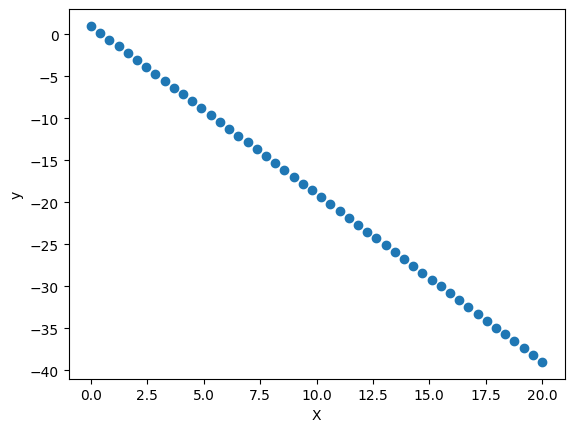

In [5]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [6]:
def LR_GD(X, y, learning_rate=0.001, max_iterations=1000, stop_criteria=0.001, cost_tolerance=0.001):
    theta_0 = 0
    theta_1 = 0
    m = len(y)

    theta_0_vals = []
    theta_1_vals = []
    cost_vals = []
    y_pred_vals = []

    for iteration in range(max_iterations):
        y_pred = theta_0 + theta_1 * X
        Error_Vector = y_pred - y

        cost = (1 / (2 * m)) * np.sum(Error_Vector ** 2)

        d_theta_0 = (1 / m) * np.sum(Error_Vector)
        d_theta_1 = (1 / m) * np.sum(Error_Vector * X)
        Gradient_Vector = np.array([d_theta_0, d_theta_1])
        Gradient_Vector_Norm = np.linalg.norm(Gradient_Vector)

        theta_0_vals.append(theta_0)
        theta_1_vals.append(theta_1)
        cost_vals.append(cost)
        y_pred_vals.append(y_pred)

        print(f"\n****************** Iteration {iteration} ********************\n")
        print(f"Predicted Values h(x):\n{y_pred}\n")
        print(f"Error Vector:\n{Error_Vector}\n")
        print(f"Cost (J): {cost:.6f}\n")
        print(f"Gradient Vector:\n{Gradient_Vector}\n")
        print(f"Gradient Vector Norm: {Gradient_Vector_Norm:.6f}\n")

        if iteration > 0:
            if (abs(cost_vals[-1] - cost_vals[-2]) < cost_tolerance) or ((Gradient_Vector_Norm < stop_criteria)):

                print("****************** Training Report ********************\n")
                print(f"Gradient Descent converged after {iteration+1} iterations\n")
                print(f"theta_0_Opt : {theta_0}")
                print(f"theta_1_Opt : {theta_1}\n")
                print(f"Error Vector:\n {Error_Vector}")
                print("\nCost =", cost, "\n")
                print(f"\nh(x) = y_predict: \n {y_pred}")
                print(f"\ny_actual : \n {y}\n")

                break

        theta_0 -= learning_rate * d_theta_0
        theta_1 -= learning_rate * d_theta_1

    return y_pred, cost_vals, theta_0_vals, theta_1_vals, y_pred_vals

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [7]:
y_pred, cost_vals, theta_0_vals, theta_1_vals, y_pred_vals = LR_GD(X, y, learning_rate=0.0005, max_iterations=300)


****************** Iteration 0 ********************

Predicted Values h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

Cost (J): 249.887755

Gradient Vector:
[ 19.        259.3877551]

Gradient Vector Norm: 260.082694


****************** Iteration 1 ************

#### Calculate r2 score

In [8]:
from sklearn.metrics import r2_score

In [9]:
print(f"r2 score: {r2_score(y, y_pred)}")

r2 score: 0.9975395965150151


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

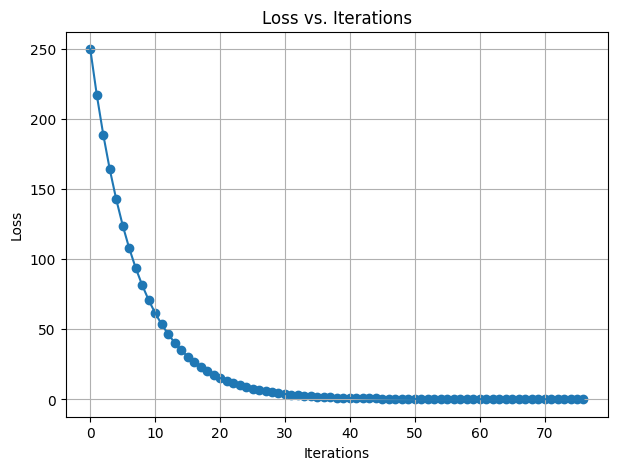

In [10]:
def loss_vs_epochs(cost_vals):
  plt.figure(figsize=(7, 5))
  plt.scatter(x=range(len(cost_vals)), y=cost_vals)
  plt.plot(cost_vals)
  plt.xlabel('Iterations')
  plt.ylabel('Loss')
  plt.title('Loss vs. Iterations')
  plt.grid()
  plt.show()

loss_vs_epochs(cost_vals)

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

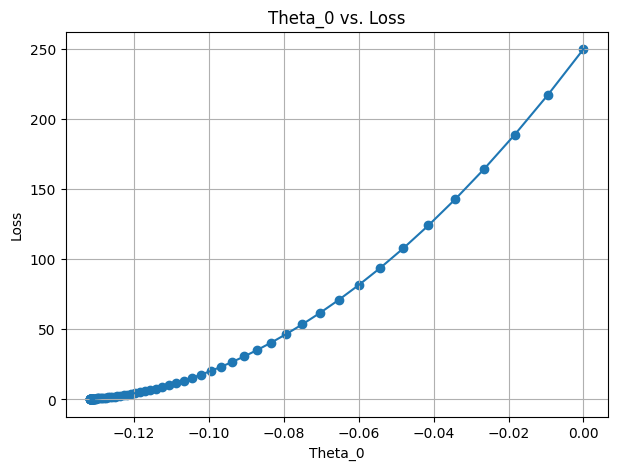

In [11]:
def theta0_vs_loss(theta_0_vals, cost_vals):
  plt.figure(figsize=(7, 5))
  plt.scatter(x=theta_0_vals, y=cost_vals)
  plt.plot(theta_0_vals, cost_vals)
  plt.xlabel('Theta_0')
  plt.ylabel('Loss')
  plt.title('Theta_0 vs. Loss')
  plt.grid()
  plt.show()

theta0_vs_loss(theta_0_vals, cost_vals)

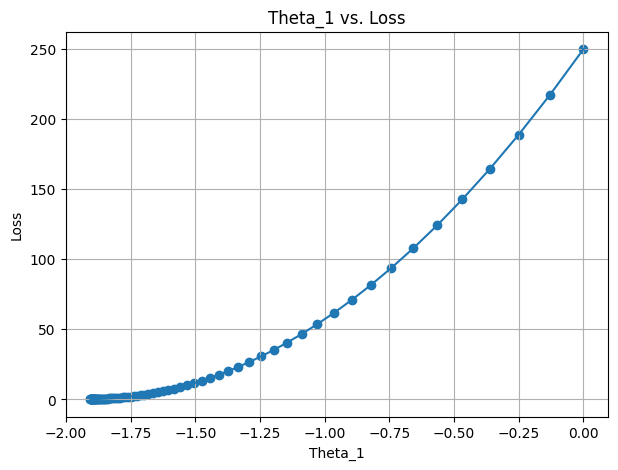

In [12]:
def theta1_vs_loss(theta_1_vals, cost_vals):
  plt.figure(figsize=(7, 5))
  plt.scatter(x=theta_1_vals, y=cost_vals)
  plt.plot(theta_1_vals, cost_vals)
  plt.xlabel('Theta_1')
  plt.ylabel('Loss')
  plt.title('Theta_1 vs. Loss')
  plt.grid()
  plt.show()

theta1_vs_loss(theta_1_vals, cost_vals)

#### Plot all regression lines till converge

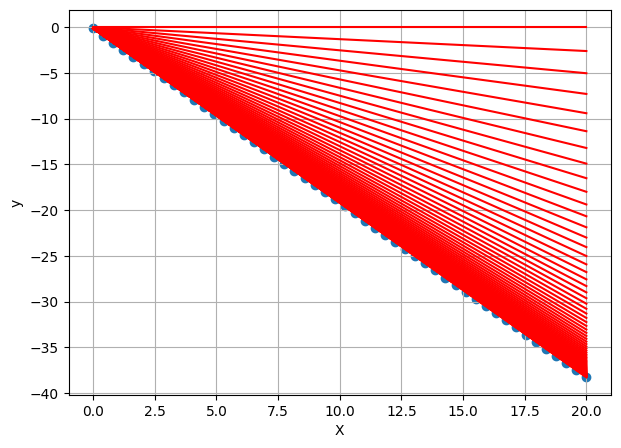

In [13]:
def plot_all_regressions(X, y, y_pred_vals):
  plt.figure(figsize=(7, 5))
  for y in y_pred_vals:
    plt.plot(X, y, color = 'r')
    plt.xlabel('X')
    plt.ylabel('y')

  plt.scatter(X, y)
  plt.grid()
  plt.show()

plot_all_regressions(X, y, y_pred_vals)

#### Plot the best regression line

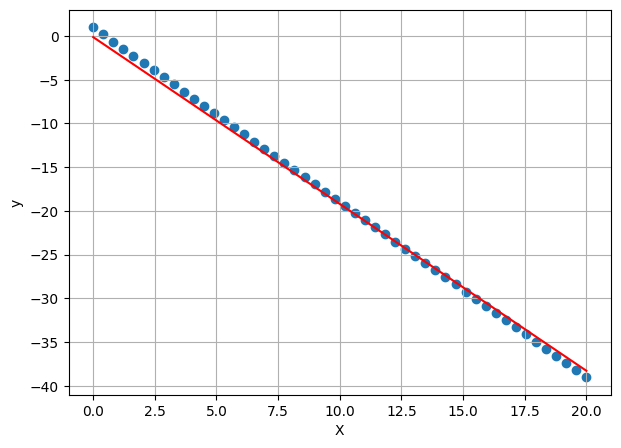

In [14]:
def plot_best_regression(X, y, y_pred):
  plt.figure(figsize=(7, 5))
  plt.plot(X, y_pred, color = 'r')
  plt.xlabel('X')
  plt.ylabel('y')

  plt.scatter(X, y)
  plt.grid()
  plt.show()

plot_best_regression(X, y, y_pred)

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [15]:
y_pred, cost_vals, theta_0_vals, theta_1_vals, y_pred_vals = LR_GD(X, y, learning_rate=0.00005, max_iterations=1000)

Streaming output truncated to the last 5000 lines.
Gradient Vector Norm: 12.143320


****************** Iteration 452 ********************

Predicted Values h(x):
[ -0.1292479   -0.87485168  -1.62045546  -2.36605924  -3.11166303
  -3.85726681  -4.60287059  -5.34847437  -6.09407815  -6.83968193
  -7.58528571  -8.33088949  -9.07649327  -9.82209706 -10.56770084
 -11.31330462 -12.0589084  -12.80451218 -13.55011596 -14.29571974
 -15.04132352 -15.7869273  -16.53253109 -17.27813487 -18.02373865
 -18.76934243 -19.51494621 -20.26054999 -21.00615377 -21.75175755
 -22.49736133 -23.24296512 -23.9885689  -24.73417268 -25.47977646
 -26.22538024 -26.97098402 -27.7165878  -28.46219158 -29.20779536
 -29.95339915 -30.69900293 -31.44460671 -32.19021049 -32.93581427
 -33.68141805 -34.42702183 -35.17262561 -35.91822939 -36.66383317]

Error Vector:
[-1.12924790e+00 -1.05852515e+00 -9.87802403e-01 -9.17079653e-01
 -8.46356904e-01 -7.75634154e-01 -7.04911405e-01 -6.34188655e-01
 -5.63465905e-01 -4.92743156e-0

In [16]:
print(f"r2 score: {r2_score(y, y_pred)}")


r2 score: 0.9965793400861428


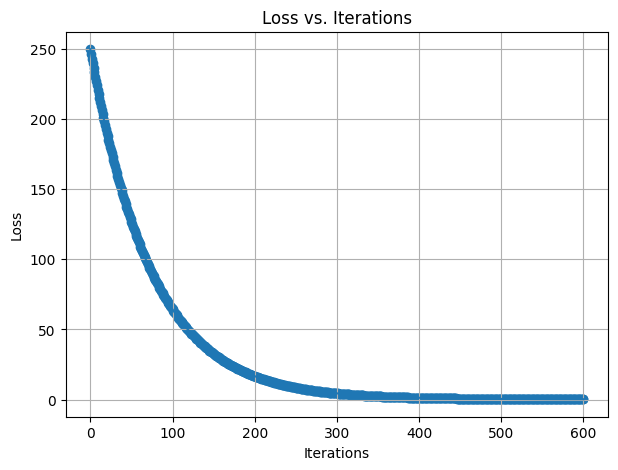

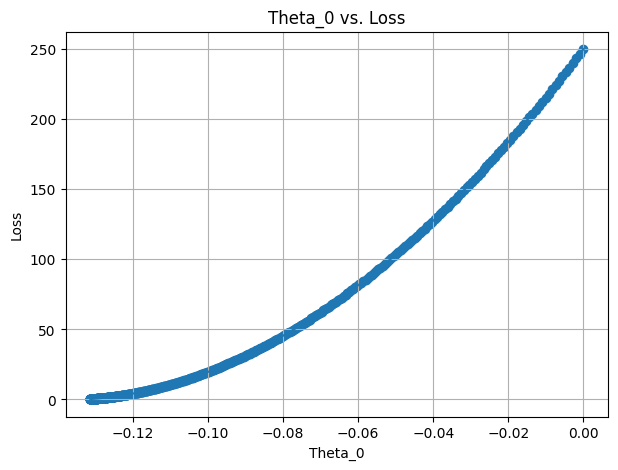

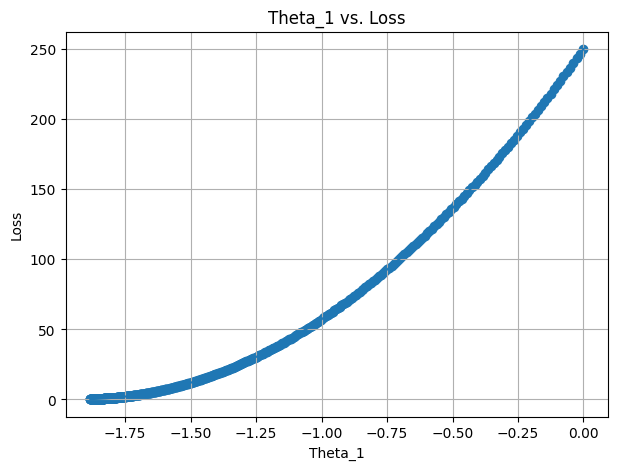

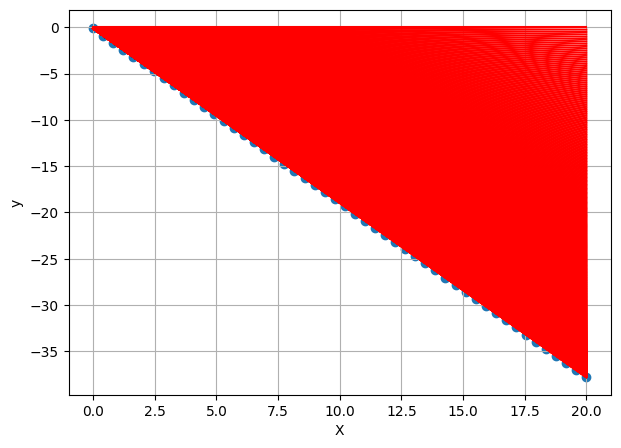

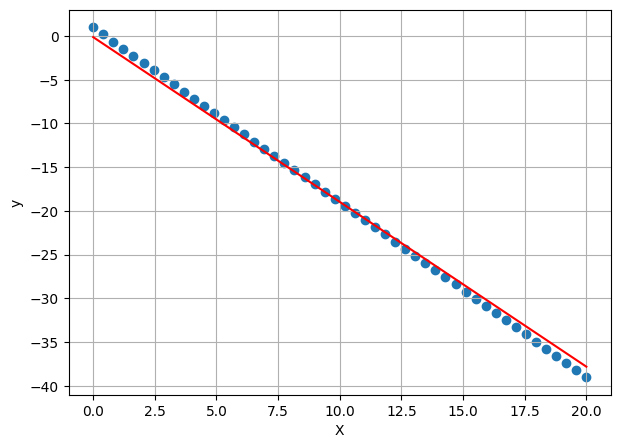

In [17]:
loss_vs_epochs(cost_vals)
theta0_vs_loss(theta_0_vals, cost_vals)
theta1_vs_loss(theta_1_vals, cost_vals)
plot_all_regressions(X, y, y_pred_vals)
plot_best_regression(X, y, y_pred)

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [18]:
y_pred, cost_vals, theta_0_vals, theta_1_vals, y_pred_vals = LR_GD(X, y, learning_rate=0.005, max_iterations=300)


****************** Iteration 0 ********************

Predicted Values h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]

Cost (J): 249.887755

Gradient Vector:
[ 19.        259.3877551]

Gradient Vector Norm: 260.082694


****************** Iteration 1 ************

In [19]:
print(f"r2 score: {r2_score(y, y_pred)}")

r2 score: 0.9976200723230484


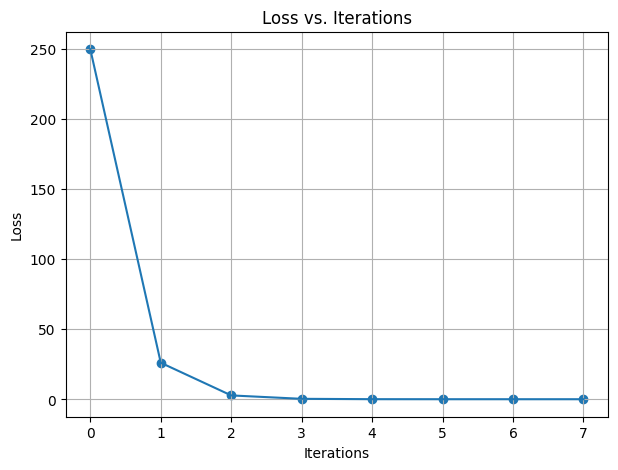

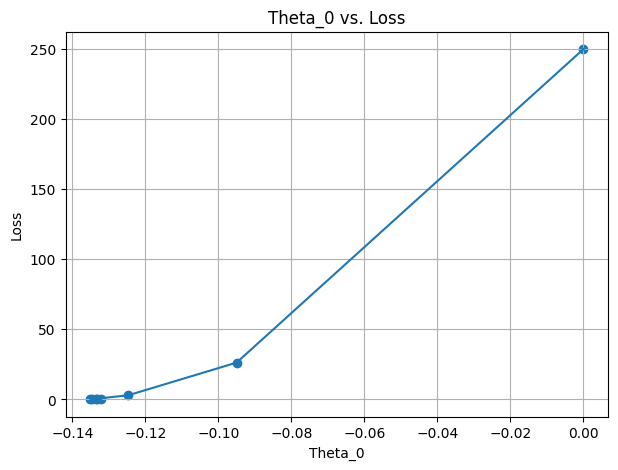

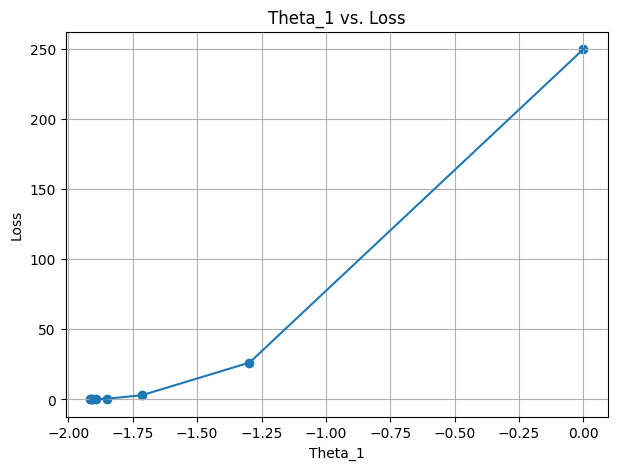

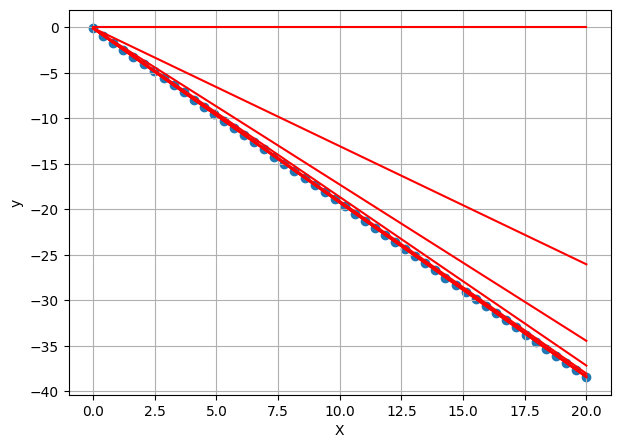

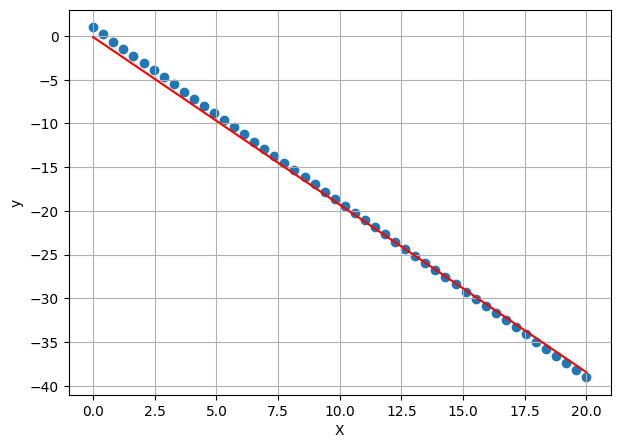

In [20]:
loss_vs_epochs(cost_vals)
theta0_vs_loss(theta_0_vals, cost_vals)
theta1_vs_loss(theta_1_vals, cost_vals)
plot_all_regressions(X, y, y_pred_vals)
plot_best_regression(X, y, y_pred)

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


In [21]:
def LR_SGD(X, y, learning_rate=0.001, max_epochs=1000, stop_criteria=0.001, cost_tolerance=0.001):
    theta_0 = 0
    theta_1 = 0
    m = len(y)

    theta_0_vals = []
    theta_1_vals = []
    cost_vals = []
    y_pred_vals = []
    cost_epoch_vals = []


    for epoch in range(max_epochs):

        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(m):

            theta_0_vals.append(theta_0)
            theta_1_vals.append(theta_1)

            x_i = X_shuffled[i]
            y_i = y_shuffled[i]

            y_pred = theta_0 + theta_1 * x_i

            error = y_pred - y_i

            cost = ((error)**2)/2
            cost_vals.append(cost)

            d_theta_0 = error
            d_theta_1 = error * x_i

            theta_0 -= learning_rate * d_theta_0
            theta_1 -= learning_rate * d_theta_1

        y_pred = theta_0 + theta_1 * X
        Error_Vector = y_pred - y
        cost_epoch = (1 / (2 * m)) * np.sum(Error_Vector ** 2)
        cost_epoch_vals.append(cost_epoch)

        print(f"****************** Epoch {epoch} ********************")
        print(f"\nCost = {cost:.12f}")
        print(f"\nGradient Vector:")
        print(f"[{d_theta_0:.8f}]")
        print(f"[{d_theta_1:.8f}]")
        print(f"\nGradient Vector Norm: {np.linalg.norm([d_theta_0, d_theta_1]):.12f}")
        print(f"\ntheta_0_new : {theta_0:.12f}")
        print(f"theta_1_new : {theta_1:.12f}")

        Gradient_Vector = np.array([d_theta_0, d_theta_1])
        Gradient_Vector_Norm = np.linalg.norm(Gradient_Vector)

        """
        if epoch > 0:
            if (abs(cost_vals[-1] - cost_vals[-m-1]) < cost_tolerance) or ((Gradient_Vector_Norm < stop_criteria)):
                break
        """

        if epoch > 0:
            if (abs(cost_epoch_vals[-1] - cost_epoch_vals[-2]) < cost_tolerance) or ((Gradient_Vector_Norm < stop_criteria)):

                print("****************** Training Report ********************\n")
                print(f"Gradient Descent converged after {epoch+1} epochs\n")
                print(f"theta_0_Opt : {theta_0:.12f}")
                print(f"theta_1_Opt : {theta_1:.12f}")
                print(f"\nCost = {cost:.12f}")
                print("\n")

                break

    return cost_vals, theta_0_vals, theta_1_vals, y_pred

##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [22]:
cost_valss1, theta_0_valss1, theta_1_valss1, y_preds1 = LR_SGD(X, y, learning_rate=0.0005, max_epochs=300)

****************** Epoch 0 ********************

Cost = 0.223892201210

Gradient Vector:
[0.66916695]
[8.74013971]

Gradient Vector Norm: 8.765718827597

theta_0_new : -0.132138888431
theta_1_new : -1.866483208408
****************** Epoch 1 ********************

Cost = 0.209488969270

Gradient Vector:
[-0.64728505]
[-3.69877173]

Gradient Vector Norm: 3.754982052871

theta_0_new : -0.128466730094
theta_1_new : -1.913887183028
****************** Epoch 2 ********************

Cost = 0.046824432869

Gradient Vector:
[-0.30602102]
[-2.87285041]

Gradient Vector Norm: 2.889103378691

theta_0_new : -0.121012412039
theta_1_new : -1.911732975578
****************** Training Report ********************

Gradient Descent converged after 3 epochs

theta_0_Opt : -0.121012412039
theta_1_Opt : -1.911732975578

Cost = 0.046824432869




In [23]:
print(f"r2 score: {r2_score(y, y_preds1)}")

r2 score: 0.9976428886206444


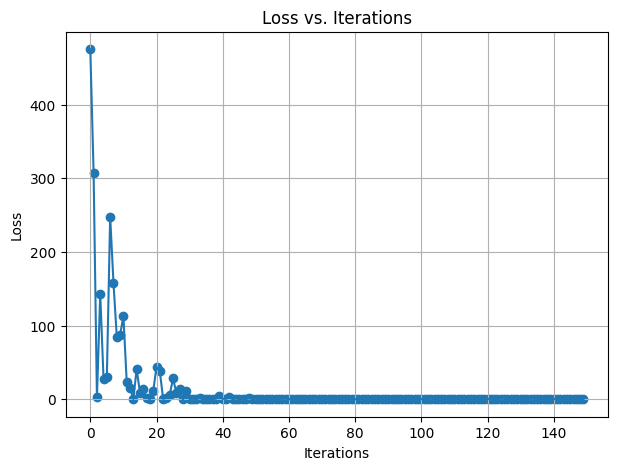

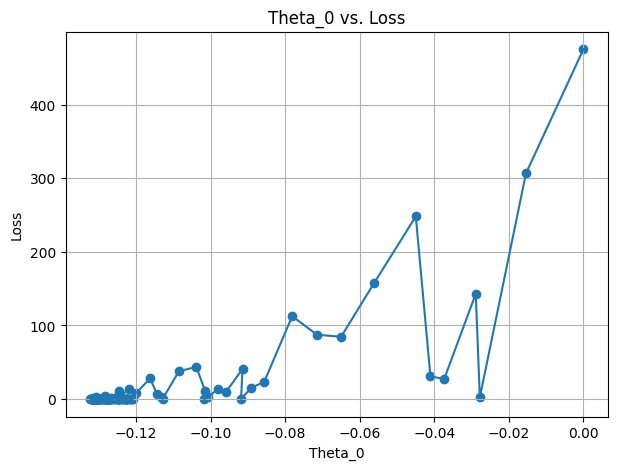

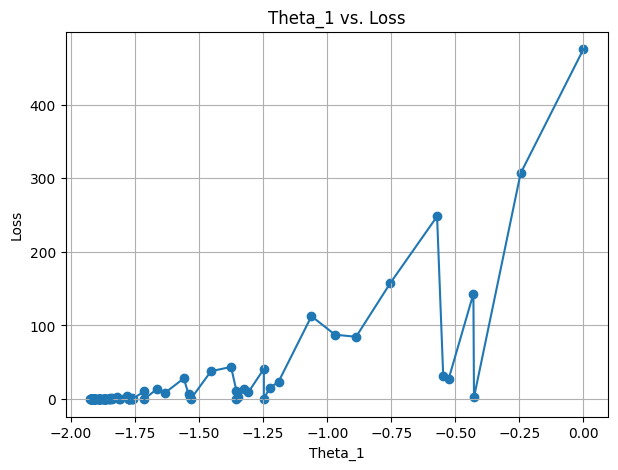

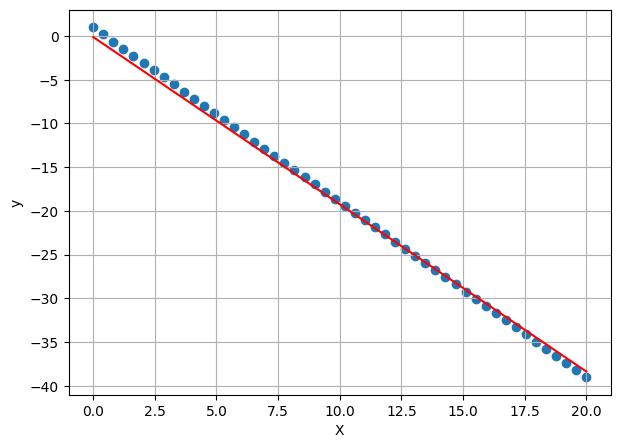

In [24]:
loss_vs_epochs(cost_valss1)
theta0_vs_loss(theta_0_valss1, cost_valss1)
theta1_vs_loss(theta_1_valss1, cost_valss1)
plot_best_regression(X, y, y_preds1)

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [25]:
cost_valss2, theta_0_valss2, theta_1_valss2, y_preds2 = LR_SGD(X, y, learning_rate=0.0001, max_epochs=300)

****************** Epoch 0 ********************

Cost = 0.579402040091

Gradient Vector:
[1.07647763]
[2.19689312]

Gradient Vector Norm: 2.446455280511

theta_0_new : -0.067601443911
theta_1_new : -0.949673692253
****************** Epoch 1 ********************

Cost = 0.497259266846

Gradient Vector:
[0.99725550]
[3.66338755]

Gradient Vector Norm: 3.796699474771

theta_0_new : -0.101723131705
theta_1_new : -1.429004858554
****************** Epoch 2 ********************

Cost = 0.361340106027

Gradient Vector:
[-0.85010600]
[-0.69396408]

Gradient Vector Norm: 1.097390704898

theta_0_new : -0.118477828041
theta_1_new : -1.671070976847
****************** Epoch 3 ********************

Cost = 0.192071789889

Gradient Vector:
[-0.61979318]
[-1.51786084]

Gradient Vector Norm: 1.639525876431

theta_0_new : -0.126197971589
theta_1_new : -1.793040947089
****************** Epoch 4 ********************

Cost = 0.016768252593

Gradient Vector:
[0.18312975]
[1.64443040]

Gradient Vector Norm: 1.

In [26]:
print(f"r2 score: {r2_score(y, y_preds2)}")

r2 score: 0.9976411734011025


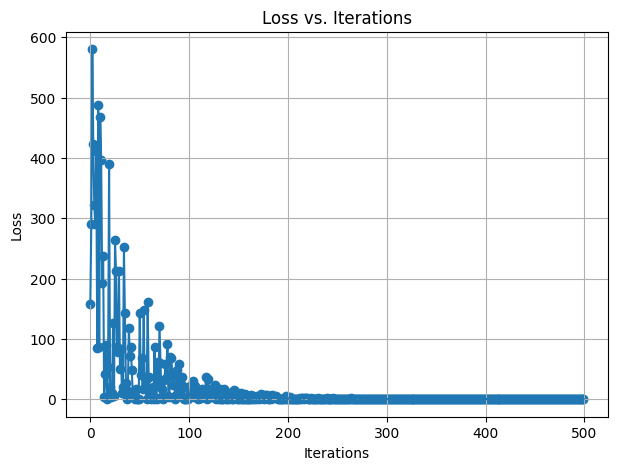

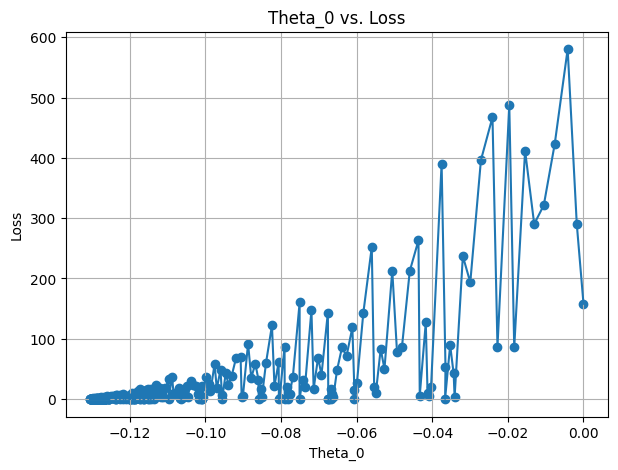

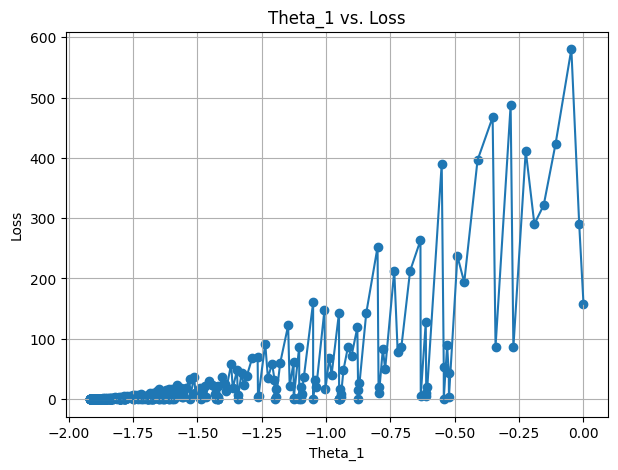

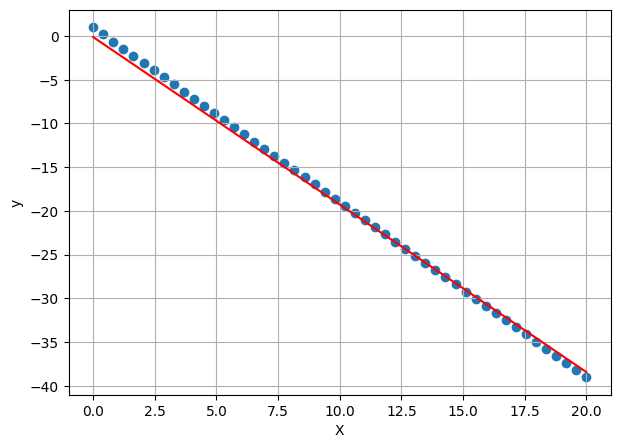

In [27]:
loss_vs_epochs(cost_valss2)
theta0_vs_loss(theta_0_valss2, cost_valss2)
theta1_vs_loss(theta_1_valss2, cost_valss2)
plot_best_regression(X, y, y_preds2)

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [28]:
cost_valss3, theta_0_valss3, theta_1_valss3, y_preds3 = LR_SGD(X, y, learning_rate=0.00007, max_epochs=300)

****************** Epoch 0 ********************

Cost = 314.870487948527

Gradient Vector:
[25.09464038]
[501.89280764]

Gradient Vector Norm: 502.519782033223

theta_0_new : -0.052735295773
theta_1_new : -0.727851543892
****************** Epoch 1 ********************

Cost = 32.250276579989

Gradient Vector:
[8.03122364]
[88.50736257]

Gradient Vector Norm: 88.870995164820

theta_0_new : -0.085033424210
theta_1_new : -1.179030609709
****************** Epoch 2 ********************

Cost = 1.983782705390

Gradient Vector:
[1.99187485]
[11.38214199]

Gradient Vector Norm: 11.555116688339

theta_0_new : -0.104742596221
theta_1_new : -1.458913097637
****************** Epoch 3 ********************

Cost = 1.798925648674

Gradient Vector:
[1.89680028]
[15.48408391]

Gradient Vector Norm: 15.599830312041

theta_0_new : -0.116358209218
theta_1_new : -1.631988236164
****************** Epoch 4 ********************

Cost = 0.402283974016

Gradient Vector:
[0.89697712]
[6.95614907]

Gradient Vecto

In [29]:
print(f"r2 score: {r2_score(y, y_preds3)}")

r2 score: 0.997643469249456


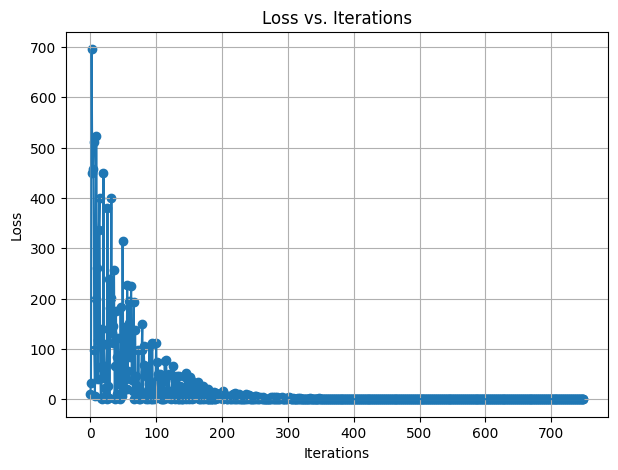

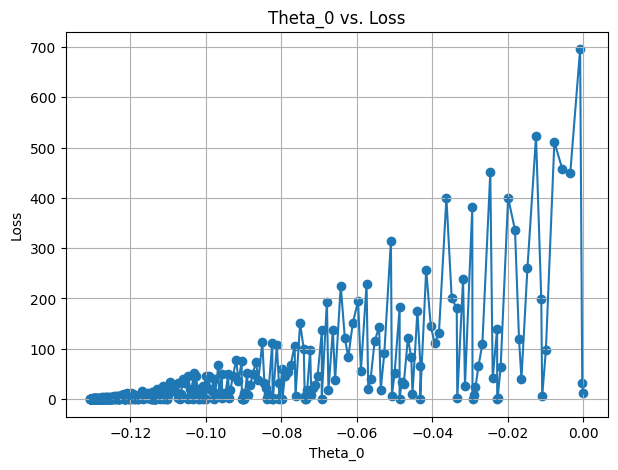

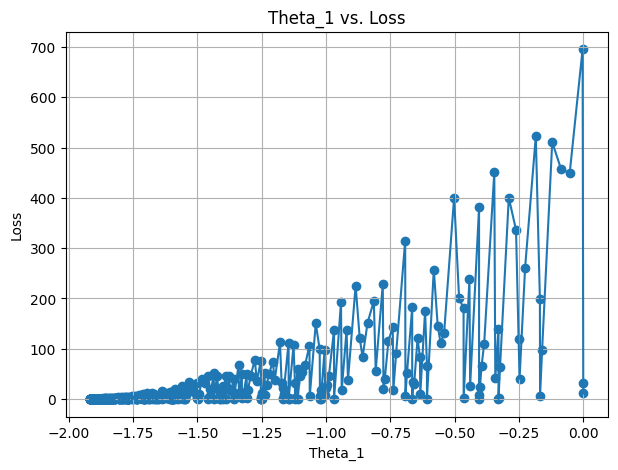

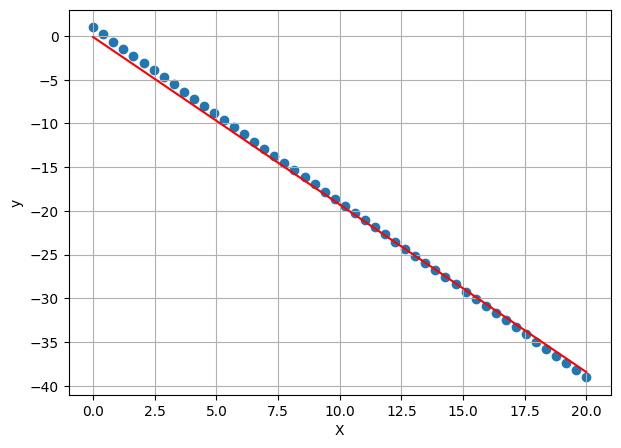

In [30]:
loss_vs_epochs(cost_valss3)
theta0_vs_loss(theta_0_valss3, cost_valss3)
theta1_vs_loss(theta_1_valss3, cost_valss3)
plot_best_regression(X, y, y_preds3)

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

In [31]:
def LR_MBGD(X, y, learning_rate=0.001, batch_size=16, max_epochs=1000, stop_criteria=0.001, cost_tolerance=0.001):
    theta_0 = 0
    theta_1 = 0
    m = len(y)

    theta_0_vals = []
    theta_1_vals = []
    cost_vals = []
    cost_epoch_vals = []

    for epoch in range(max_epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            y_pred_batch = theta_0 + theta_1 * X_batch
            error = y_pred_batch - y_batch

            cost = np.mean((error ** 2))/2
            cost_vals.append(cost)

            d_theta_0 = np.mean(error)
            d_theta_1 = np.mean(error * X_batch)

            theta_0 -= learning_rate * d_theta_0
            theta_1 -= learning_rate * d_theta_1

            theta_0_vals.append(theta_0)
            theta_1_vals.append(theta_1)


        y_pred = theta_0 + theta_1 * X
        Error_Vector = y_pred - y
        cost_epoch = np.mean((Error_Vector ** 2) / 2)
        cost_epoch_vals.append(cost_epoch)

        Gradient_Vector = np.array([d_theta_0, d_theta_1])
        Gradient_Vector_Norm = np.linalg.norm(Gradient_Vector)

        print(f"\n****************** Epoch {epoch+1} ********************\n")
        print(f"\nCost = {cost_epoch:.12f}")
        print(f"\nGradient Vector:")
        print(f"[{d_theta_0:.8f}]")
        print(f"[{d_theta_1:.8f}]")
        print(f"\nGradient Vector Norm: {Gradient_Vector_Norm:.12f}")
        print(f"theta_0_new : {theta_0:.12f}")
        print(f"theta_1_new : {theta_1:.12f}")

        if epoch > 0 and (abs(cost_epoch_vals[-1] - cost_epoch_vals[-2]) < cost_tolerance or Gradient_Vector_Norm < stop_criteria):

            print("****************** Training Report ********************\n")
            print(f"Gradient Descent converged after {epoch+1} epochs\n")
            print(f"theta_0_Opt : {theta_0:.12f}")
            print(f"theta_1_Opt : {theta_1:.12f}")
            print(f"\nFinal Cost = {cost_epoch:.12f}\n")

            break


    return cost_vals, theta_0_vals, theta_1_vals, y_pred

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [32]:
cost_valsmb1, theta_0_valsmb1, theta_1_valsmb1, y_predmb1 = LR_MBGD(X, y, learning_rate=0.0005, batch_size=5, max_epochs = 300)


****************** Epoch 1 ********************


Cost = 60.990884348140

Gradient Vector:
[7.90435351]
[94.79093444]

Gradient Vector Norm: 95.119924602625
theta_0_new : -0.069960073327
theta_1_new : -0.970072651006

****************** Epoch 2 ********************


Cost = 14.922134612045

Gradient Vector:
[6.65882409]
[110.50470295]

Gradient Vector Norm: 110.705145830474
theta_0_new : -0.105059369207
theta_1_new : -1.449731414865

****************** Epoch 3 ********************


Cost = 3.778420821301

Gradient Vector:
[1.81567222]
[18.05851102]

Gradient Vector Norm: 18.149558834084
theta_0_new : -0.120938422382
theta_1_new : -1.685044035489

****************** Epoch 4 ********************


Cost = 1.049714029757

Gradient Vector:
[0.19492133]
[3.26744390]

Gradient Vector Norm: 3.273252814250
theta_0_new : -0.128115742381
theta_1_new : -1.801559521729

****************** Epoch 5 ********************


Cost = 0.377083824546

Gradient Vector:
[0.83612848]
[17.19792595]

Gradient Ve

In [33]:
print(f"r2 score: {r2_score(y, y_predmb1)}")

r2 score: 0.9976445323900586


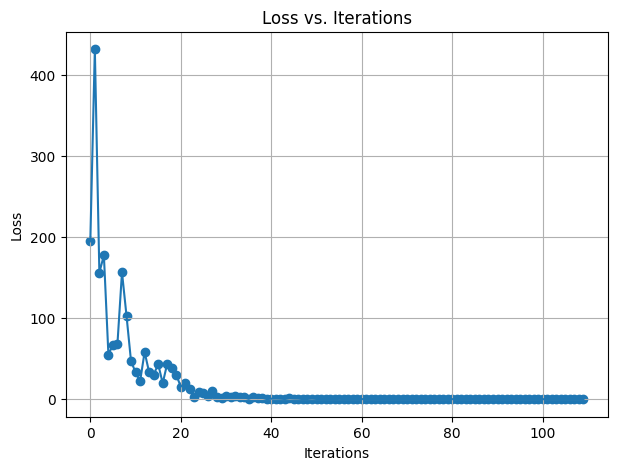

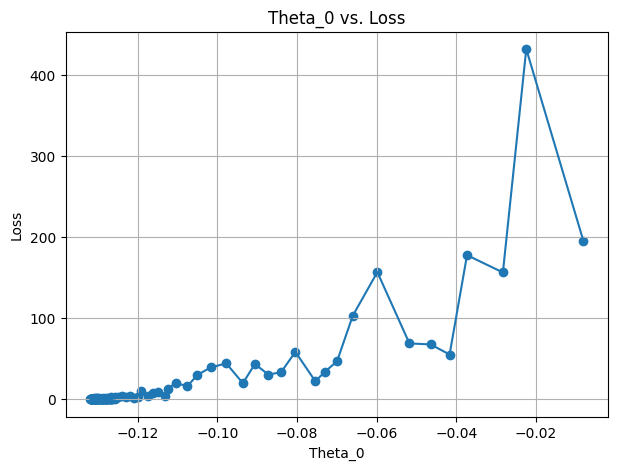

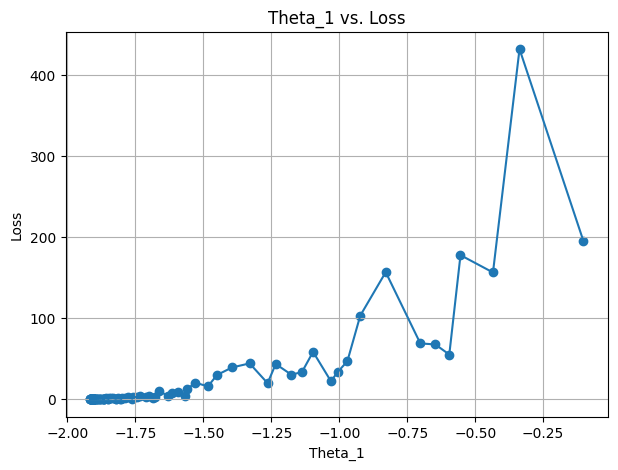

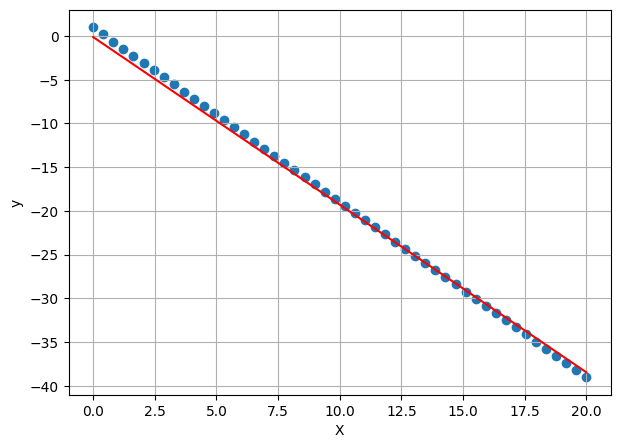

In [34]:
loss_vs_epochs(cost_valsmb1)
theta0_vs_loss(theta_0_valsmb1, cost_valsmb1)
theta1_vs_loss(theta_1_valsmb1, cost_valsmb1)
plot_best_regression(X, y, y_predmb1)

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [35]:
cost_valsmb2, theta_0_valsmb2, theta_1_valsmb2, y_predmb2 = LR_MBGD(X, y, learning_rate=0.0005, batch_size=10, max_epochs = 300)


****************** Epoch 1 ********************


Cost = 123.723098237003

Gradient Vector:
[14.88159174]
[218.59013659]

Gradient Vector Norm: 219.096119516268
theta_0_new : -0.041958227263
theta_1_new : -0.568011769084

****************** Epoch 2 ********************


Cost = 61.300976870569

Gradient Vector:
[13.60855720]
[210.36469381]

Gradient Vector Norm: 210.804405152212
theta_0_new : -0.071189394550
theta_1_new : -0.967564983677

****************** Epoch 3 ********************


Cost = 30.289283297702

Gradient Vector:
[11.16432924]
[186.19145796]

Gradient Vector Norm: 186.525872912771
theta_0_new : -0.091573219780
theta_1_new : -1.250025933255

****************** Epoch 4 ********************


Cost = 15.084378246070

Gradient Vector:
[3.92124115]
[44.79666625]

Gradient Vector Norm: 44.967960141302
theta_0_new : -0.105416099587
theta_1_new : -1.447141009300

****************** Epoch 5 ********************


Cost = 7.563111063539

Gradient Vector:
[3.61645787]
[55.89782243]


In [36]:
print(f"r2 score: {r2_score(y, y_predmb2)}")

r2 score: 0.9976174341740941


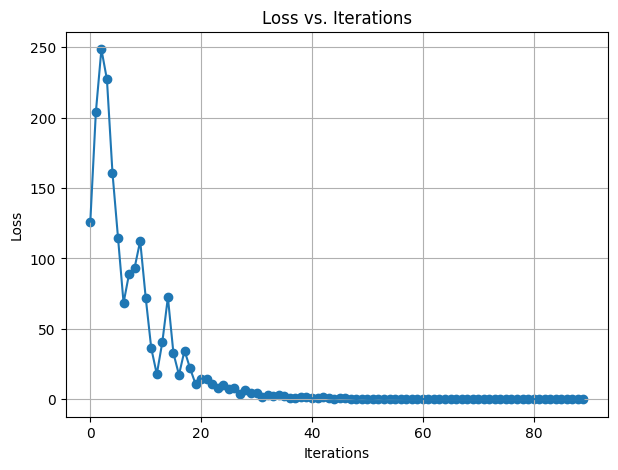

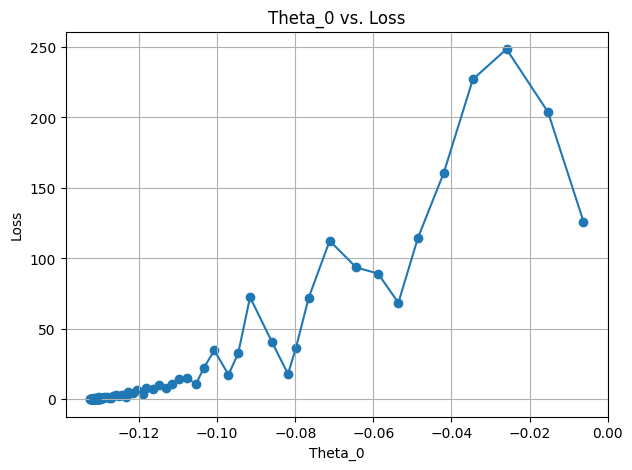

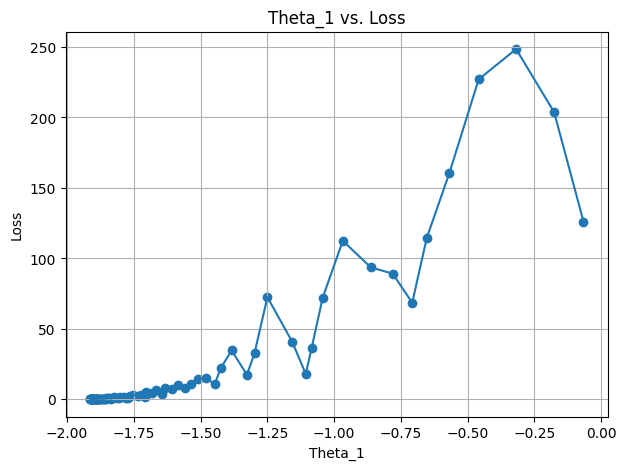

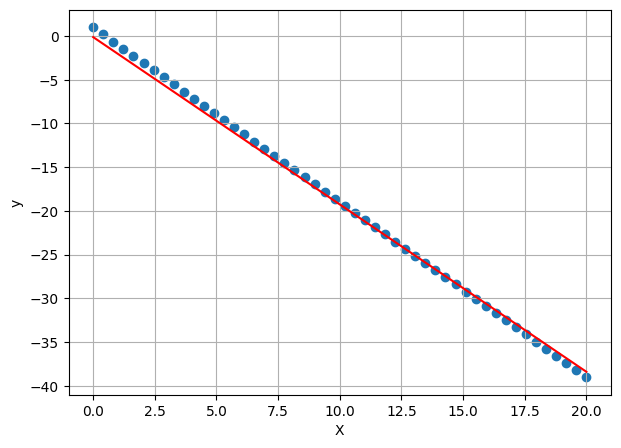

In [37]:
loss_vs_epochs(cost_valsmb2)
theta0_vs_loss(theta_0_valsmb2, cost_valsmb2)
theta1_vs_loss(theta_1_valsmb2, cost_valsmb2)
plot_best_regression(X, y, y_predmb2)

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [38]:
cost_valsmb3, theta_0_valsmb3, theta_1_valsmb3, y_predmb3 = LR_MBGD(X, y, learning_rate=0.0005, batch_size=20, max_epochs = 300)


****************** Epoch 1 ********************


Cost = 166.644416737476

Gradient Vector:
[13.85328913]
[173.08615199]

Gradient Vector Norm: 173.639654540120
theta_0_new : -0.025882274121
theta_1_new : -0.351447854317

****************** Epoch 2 ********************


Cost = 108.455979443034

Gradient Vector:
[14.75416471]
[206.66860173]

Gradient Vector Norm: 207.194585641173
theta_0_new : -0.047802688402
theta_1_new : -0.654017961372

****************** Epoch 3 ********************


Cost = 73.686795606667

Gradient Vector:
[7.13547084]
[73.47585312]

Gradient Vector Norm: 73.821514048021
theta_0_new : -0.064219206217
theta_1_new : -0.876015402174

****************** Epoch 4 ********************


Cost = 48.400019238671

Gradient Vector:
[9.16963287]
[123.12068364]

Gradient Vector Norm: 123.461673838855
theta_0_new : -0.078555567206
theta_1_new : -1.073496213113

****************** Epoch 5 ********************


Cost = 31.947741735059

Gradient Vector:
[6.66251996]
[93.60766232]

In [39]:
print(f"r2 score: {r2_score(y, y_predmb3)}")

r2 score: 0.9976039396597682


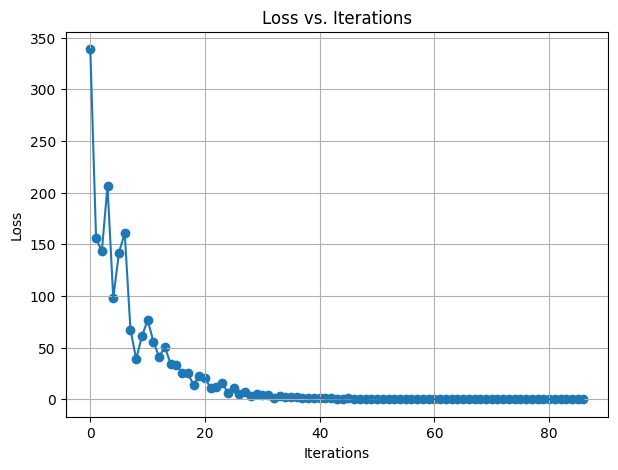

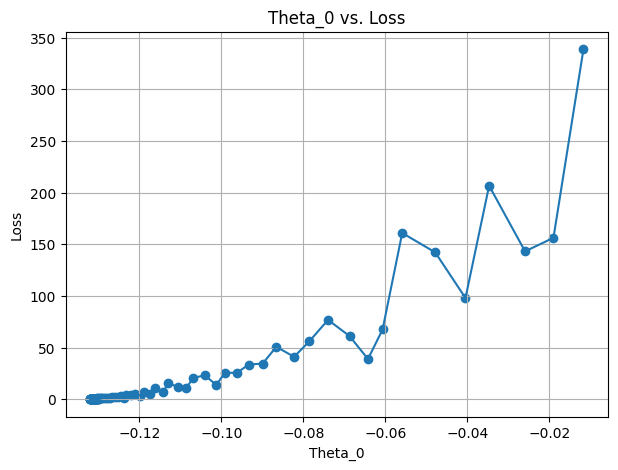

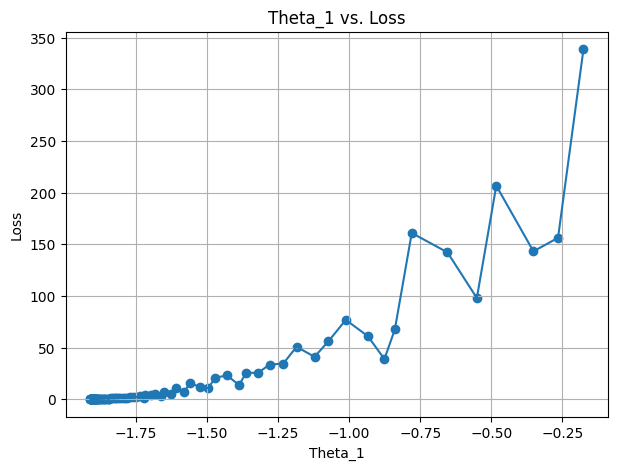

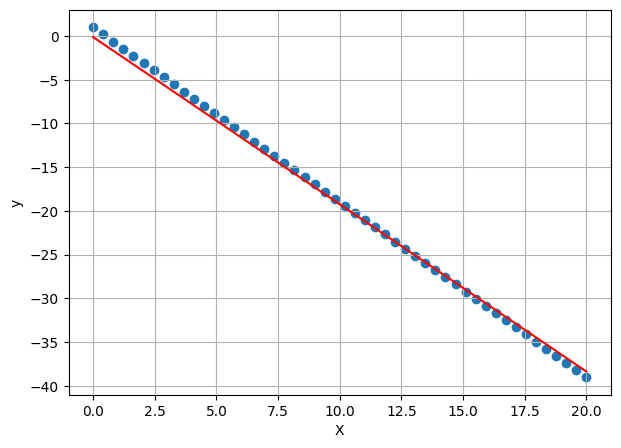

In [40]:
loss_vs_epochs(cost_valsmb3)
theta0_vs_loss(theta_0_valsmb3, cost_valsmb3)
theta1_vs_loss(theta_1_valsmb3, cost_valsmb3)
plot_best_regression(X, y, y_predmb3)